#GROUP11
#Title: Effect of AI-Powered Chatbots on Customer Support Efficiency

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [ ]:
#Datasets
customer_satisfaction = pd.read_csv(r'Customer_Survey.csv')
support_ticket = pd.read_csv(r'Customer_Support.csv')
chat_data = pd.read_csv(r'Chat_Team_CaseStudy.csv')

In [ ]:
customer_satisfaction.columns = customer_satisfaction.columns.str.strip()
support_ticket.columns = support_ticket.columns.str.strip()
chat_data.columns = chat_data.columns.str.strip()

In [ ]:
print("Customer Satisfaction Data:")
customer_satisfaction.head()

Customer Satisfaction Data:


,Customer Name,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,Marisa Obrien,5.0,3.0,4.0,Yes
1,Jessica Rios,3.0,4.0,3.0,Yes
2,Christopher Robbins,4.0,5.0,2.0,Yes
3,Christina Dillon,5.0,3.0,4.0,Yes
4,Alexander Carroll,2.0,5.0,1.0,Yes


In [ ]:
print("\nDescriptive Statistics for Customer Satisfaction Data:")
print(customer_satisfaction.describe())


Descriptive Statistics for Customer Satisfaction Data:
       How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
count                                        8125.000000                                                                                                          
mean                                            3.325538                                                                                                          
std                                             1.419858                                                                                                          
min                                             1.000000                                                                                                          
25%                                             2.000000                                                                         

In [ ]:
print("\nSupport Ticket Data:")
support_ticket.head()


Support Ticket Data:


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
print("\nDescriptive Statistics for Support Ticket Data:")
print(support_ticket.describe())


Descriptive Statistics for Support Ticket Data:
         Ticket ID  Customer Age  Customer Satisfaction Rating
count  8469.000000   8469.000000                   2769.000000
mean   4235.000000     44.026804                      2.991333
std    2444.934048     15.296112                      1.407016
min       1.000000     18.000000                      1.000000
25%    2118.000000     31.000000                      2.000000
50%    4235.000000     44.000000                      3.000000
75%    6352.000000     57.000000                      4.000000
max    8469.000000     70.000000                      5.000000


In [ ]:
print("\nChat Data:")
chat_data.head()


Chat Data:


,Transaction Start Date,Agent,Chat Duration,Teams,Session Name,Chat Closed By,Interactive Chat,Browser,Operating System,Geo,Response Time of Agent,Response time of Visitor,Transaction End Date,Customer Name,Customer Comment,Transferred Chat,Customer Wait Time,Text
0,06-08-2018 23:59,Zaha,00:18:22,Mobile Service Team,Session:2057187615:23360,Customer,True,Edge 16.16299,Windows-10,Sweden,00:01:02,00:00:43,07-08-2018 00:18,Marisa Obrien,,False,00:00:01,I would really like to know the criteria which...
1,06-08-2018 23:59,Berenice,00:03:05,Mobile Technical Team,Session:2057187614:23368,Representative,False,Edge,Windows,Australia,00:00:00,00:00:00,07-08-2018 00:02,Jessica Rios,,True,00:01:01,NaN
2,06-08-2018 23:59,Madi,00:22:33,Mobile Service Team,Session:2057187615:23358,Customer,True,c~67.0.3396.87,Android-4.3,Australia,00:00:32,00:01:28,07-08-2018 00:26,Christopher Robbins,,False,00:00:01,NaN
3,06-08-2018 23:59,Rose,00:38:20,Mobile Service Team,Session:2057187616:18361,System,True,Other,11.4.1,NaN,00:00:37,00:01:18,07-08-2018 00:38,Christina Dillon,,False,00:00:01,Just wondered which airline would give any so...
4,06-08-2018 23:59,Sarrah,00:11:50,Fixed Service Team,Session:2057187617:2598,Representative,True,Other,Android 8.1.0,NaN,00:00:21,00:00:38,07-08-2018 00:14,Alexander Carroll,,False,00:00:01,Do they offer lunch or should we eat outside?


In [ ]:
print("\nDescriptive Statistics for Chat Data:")
print(chat_data.describe())


Descriptive Statistics for Chat Data:
       Transaction Start Date   Agent Chat Duration                Teams  \
count                    8469    8469          8469                 8469   
unique                    349     630          2769                    6   
top          06-08-2018 19:54  Sienna      00:03:06  Mobile Service Team   
freq                       45      81           468                 4290   

                    Session Name Chat Closed By Interactive Chat Browser  \
count                       8469           8399             8469    8469   
unique                      8469              3                2     190   
top     Session:2057187615:23360       Customer             True   Other   
freq                           1           3499             6262    4536   

       Operating System        Geo Response Time of Agent  \
count              8469       4638                   8469   
unique              125         46                    133   
top             

In [ ]:
#Renaming the customer satisfaction columns
customer_satisfaction.rename(columns={
    'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Overall_delivery',
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Quality',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Speed',
    'Was your order accurate? Please respond yes or no.': 'Order_accuracy'
}, inplace=True)

In [ ]:
print("Customer Satisfaction Columns:", customer_satisfaction.columns)
print("Support Ticket Columns:", support_ticket.columns)
print("Chat Data Columns:", chat_data.columns)

print("Customer Satisfaction 'Customer Name' present:", 'Customer Name' in customer_satisfaction.columns)
print("Support Ticket 'Customer Name' present:", 'Customer Name' in support_ticket.columns)
print("Chat Data 'Customer Name' present:", 'Customer Name' in chat_data.columns)

Customer Satisfaction Columns: Index(['Customer Name', 'Overall_delivery', 'Quality', 'Speed',
       'Order_accuracy'],
      dtype='object')
Support Ticket Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Chat Data Columns: Index(['Transaction Start Date', 'Agent', 'Chat Duration', 'Teams',
       'Session Name', 'Chat Closed By', 'Interactive Chat', 'Browser',
       'Operating System', 'Geo', 'Response Time of Agent',
       'Response time of Visitor', 'Transaction End Date', 'Customer Name',
       'Customer Comment', 'Transferred Chat', 'Customer Wait Time', 'Text'],
      dtype='object')
Customer Satisfaction 'Customer Name' present: Tr

In [ ]:
# Handle Missing Values
print("\nMissing values in 'Customer Name':")
print("Customer Satisfaction:", customer_satisfaction['Customer Name'].isnull().sum())
print("Support Ticket:", support_ticket['Customer Name'].isnull().sum())
print("Chat Data:", chat_data['Customer Name'].isnull().sum())


Missing values in 'Customer Name':
Customer Satisfaction: 0
Support Ticket: 0
Chat Data: 0


In [ ]:
# Remove Duplicates
print("\nDuplicate values in 'Customer Name':")
print("Customer Satisfaction:", customer_satisfaction['Customer Name'].duplicated().sum())
print("Support Ticket:", support_ticket['Customer Name'].duplicated().sum())
print("Chat Data:", chat_data['Customer Name'].duplicated().sum())


Duplicate values in 'Customer Name':
Customer Satisfaction: 441
Support Ticket: 441
Chat Data: 441


In [ ]:
# Merge Dataframes
merged_data = pd.merge(customer_satisfaction, support_ticket, on='Customer Name', how='inner')

final_merged_data = pd.merge(merged_data, chat_data, on='Customer Name', how='inner')

# Display the shape and preview of the merged data
print("\nShape of merged data:", final_merged_data.shape)
print(final_merged_data.head())


Shape of merged data: (12207, 38)
         Customer Name  Overall_delivery  Quality  Speed Order_accuracy  \
0        Marisa Obrien               5.0      3.0    4.0            Yes   
1         Jessica Rios               3.0      4.0    3.0            Yes   
2  Christopher Robbins               4.0      5.0    2.0            Yes   
3     Christina Dillon               5.0      3.0    4.0            Yes   
4    Alexander Carroll               2.0      5.0    1.0            Yes   

   Ticket ID              Customer Email  Customer Age Customer Gender  \
0          1  carrollallison@example.com            32           Other   
1          2    clarkeashley@example.com            42          Female   
2          3   gonzalestracy@example.com            48           Other   
3          4    bradleyolson@example.org            27          Female   
4          5     bradleymark@example.com            67          Female   

  Product Purchased  ...         Browser Operating System        Geo 

In [ ]:
#Preprocess Data for Model
from sklearn.impute import SimpleImputer
final_merged_data = final_merged_data.select_dtypes(include=[np.number])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
final_merged_data = pd.DataFrame(imputer.fit_transform(final_merged_data), columns=final_merged_data.columns)

print("\nMissing values after imputation:")
print(final_merged_data.isnull().sum())


Missing values after imputation:
Overall_delivery                0
Quality                         0
Speed                           0
Ticket ID                       0
Customer Age                    0
Customer Satisfaction Rating    0
dtype: int64


In [ ]:
print("\nDescriptive Statistics for Chatbot Data:")
print(chat_data.describe())


Descriptive Statistics for Chatbot Data:
       Transaction Start Date   Agent Chat Duration                Teams  \
count                    8469    8469          8469                 8469   
unique                    349     630          2769                    6   
top          06-08-2018 19:54  Sienna      00:03:06  Mobile Service Team   
freq                       45      81           468                 4290   

                    Session Name Chat Closed By Interactive Chat Browser  \
count                       8469           8399             8469    8469   
unique                      8469              3                2     190   
top     Session:2057187615:23360       Customer             True   Other   
freq                           1           3499             6262    4536   

       Operating System        Geo Response Time of Agent  \
count              8469       4638                   8469   
unique              125         46                    133   
top          

In [ ]:
X = final_merged_data.drop(columns=['Overall_delivery'])
y = final_merged_data['Overall_delivery']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("\nMissing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())
print("Missing values in y_test:", y_test.isnull().sum())


Missing values in X_train: 0
Missing values in y_train: 0
Missing values in X_test: 0
Missing values in y_test: 0


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.5140334418936658
R-squared: 0.19800152387465253


In [ ]:
print(final_merged_data.columns)

Index(['Overall_delivery', 'Quality', 'Speed', 'Ticket ID', 'Customer Age',
       'Customer Satisfaction Rating'],
      dtype='object')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = final_merged_data[['Quality', 'Speed', 'Customer Satisfaction Rating']]
y = final_merged_data['Overall_delivery']

X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.5139429429462512
R-squared: 0.19804946206142515


In [ ]:
from scipy import stats

final_merged_data['Support_Type'] = final_merged_data['Ticket ID'].apply(lambda x: 'Chatbot' if x % 2 == 0 else 'Human')

chatbot_satisfaction = final_merged_data[final_merged_data['Support_Type'] == 'Chatbot']['Overall_delivery']
human_satisfaction = final_merged_data[final_merged_data['Support_Type'] == 'Human']['Overall_delivery']

# Performing T-test
t_stat, p_val = stats.ttest_ind(chatbot_satisfaction, human_satisfaction, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("There is a significant difference in satisfaction between chatbot and human support.")
else:
    print("No significant difference in satisfaction between chatbot and human support.")

T-statistic: 0.5482728013257618, P-value: 0.5835146279359457
No significant difference in satisfaction between chatbot and human support.


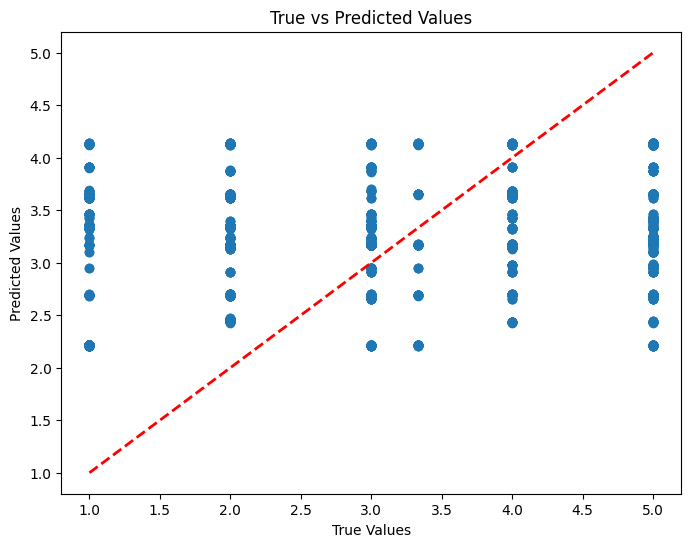


Model training and evaluation complete!


In [ ]:
# Plotting the true vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

print("\nModel training and evaluation complete!")

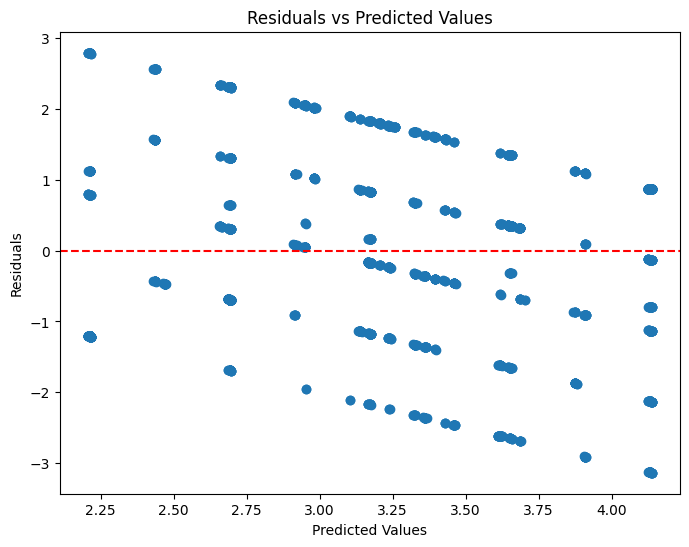

In [ ]:
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Overall_delivery   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1004.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:49:19   Log-Likelihood:                -19925.
No. Observations:               12207   AIC:                         3.986e+04
Df Residuals:                   12203   BIC:                         3.989e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

#LinearRegression model
model = LinearRegression()

# Performing cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Converting negative MSE scores to positive RMSE
rmse_scores = np.sqrt(-scores)

print(f"Cross-validation RMSE scores: {rmse_scores}")
print(f"Average RMSE: {np.mean(rmse_scores)}")

Cross-validation RMSE scores: [1.18024587 1.29536533 1.20422079 1.26967203 1.25516302]
Average RMSE: 1.2409334092819861
